# Parrainages présidentielle française 2022

In [3]:
import json
import requests
import pandas as pd
url = 'https://presidentielle2022.conseil-constitutionnel.fr/telechargement/parrainagestotal.json'
file = requests.get(url, stream=True)
z=pd.read_json(file.text)
raw2022=z
#raw2022=pd.read_json('https://presidentielle2022.conseil-constitutionnel.fr/telechargement/parrainagestotal.json',\
#              encoding='utf-8-sig')
dicoCandidats2022=raw2022.groupby('Candidat')['Candidat'].count().sort_values(ascending=False).to_dict()

In [5]:
dicoCandidats2022

{'PÉCRESSE Valérie': 2271,
 'MACRON Emmanuel': 1544,
 'HIDALGO Anne': 1226,
 'JADOT Yannick': 615,
 'ROUSSEL Fabien': 593,
 'LASSALLE Jean': 579,
 'ARTHAUD Nathalie': 562,
 'MÉLENCHON Jean-Luc': 540,
 'DUPONT-AIGNAN Nicolas': 457,
 'ZEMMOUR Éric': 415,
 'LE PEN Marine': 414,
 'ASSELINEAU François': 247,
 'POUTOU Philippe': 243,
 'KAZIB Anasse': 130,
 'TAUBIRA Christiane': 128,
 'THOUY Hélène': 97,
 'KOENIG Gaspard': 49,
 'KUZMANOVIC Georges': 42,
 'EGGER Clara': 24,
 'MIGUET Nicolas': 18,
 'MARTINEZ Antoine': 11,
 'CHICHE Arnaud': 9,
 'SMATI  Rafik': 8,
 'WAECHTER Antoine': 4,
 'BÉKAERT Corinne': 4,
 'CAU Marie': 4,
 'FORTANÉ Jean-Marc': 3,
 'ROCCA Martin': 3,
 'MEURICE Guillaume': 2,
 'RIVOAL Stéphanie': 2,
 'VIEIRA Gildas': 2,
 'DELGA Carole': 1,
 'SCHOVANEC Josef': 1,
 'COJAN Patrick': 1,
 'BORLOO Jean-Louis': 1,
 'BARNIER Michel': 1,
 'CAHEZ Thierry': 1,
 'HOLLANDE François': 1,
 'FESSARD DE FOUCAULT Bertrand': 1,
 'FIORILE Eric Régis': 1,
 'MONTEBOURG Arnaud': 1,
 'SAINT-PAUL Laet

## Create a pandas dataframe with pycoa keys

In [6]:
z2022=raw2022.groupby(['Candidat','DatePublication','Departement']).size().reset_index(name='count')
z2022=z2022.rename(columns={'DatePublication':'date','Departement':'where'})
#reoderer for pycoa stuff    
z2022=z2022[['where','date','Candidat','count']]
z2022['date']=pd.to_datetime(z2022['date']).dt.date

# Parrainages présidentielle française 2017

In [8]:
raw2017=pd.read_csv('https://static.data.gouv.fr/resources/parrainages/20170320-103202/parrainagestotal.csv',sep=';')
raw2017['Date de publication']=pd.to_datetime(raw2017['Date de publication'],dayfirst=True).dt.date
z2017=raw2017.rename(columns={'Date de publication':'date','Département':'where','Candidat-e parrainé-e':'Candidat'})

renamecandidat={'MELENCHON Jean-Luc':'MÉLENCHON Jean-Luc'}
z2017['Candidat']=z2017.Candidat.replace(renamecandidat)
dicoCandidats2017=z2017.groupby('Candidat')['Candidat'].count().sort_values(ascending=False).to_dict()

z2017=z2017.groupby(['Candidat','date','where']).size().reset_index(name='count')
#reoderer for pycoa stuff    
z2017=z2017[['where','date','Candidat','count']]

# Include pycoa module and pimp the pandas to fit with pycoa parser

In [7]:
import sys
sys.path.insert(1, 'pycoa')
import coa.ffront as cf

SPF aka Sante Publique France database selected (France departement granularity) ...
... Nine different databases from SPF will be parsed ...
Few information concernant the selected database :  spf
Available key-words, which ∈ ['tot_dc', 'cur_hosp', 'tot_rad', 'cur_rea', 'tot_vacc1', 'tot_vacc2', 'tot_vacc3', 'tot_vacc4', 'tot_rappel_vacc', 'cur_idx_tx_incid', 'cur_idx_R', 'cur_idx_taux_occupation_sae', 'cur_taux_pos', 'cur_idx_Prc_tests_PCR_TA_crible', 'cur_idx_Prc_susp_501Y_V1', 'cur_idx_Prc_susp_501Y_V2_3', 'cur_idx_Prc_susp_IND', 'cur_idx_Prc_susp_ABS', 'cur_idx_ti', 'cur_idx_tp', 'cur_taux_crib', 'cur_idx_tx_A1', 'cur_idx_tx_B1', 'cur_idx_tx_C1', 'cur_nbre_pass_corona', 'cur_nb_A0', 'cur_nb_A1', 'cur_nb_B0', 'cur_nb_B1', 'cur_nb_C0', 'cur_nb_C1', 'tot_incid_hosp', 'tot_incid_rea', 'tot_incid_rad', 'tot_incid_dc', 'tot_P', 'tot_T']
Example of location :  Haute-Marne, Lozère, Ain, Haute-Savoie, Aisne  ...
Last date data  2022-02-26
SPF aka Sante Publique France database selected (Fr

## Fill the missing_dates using fill_missing_dates from pycoa tool

In [9]:
import coa.tools as tls
def missing_date(listcandidat,pandy):
    pfill=pd.DataFrame()
    for i in listcandidat:
        temp=tls.fill_missing_dates(pandy.loc[pandy.Candidat==i],loc_field='where')
        temp['Candidat']=temp['Candidat'].fillna(method='bfill')
        temp['count']=temp['count'].fillna(0)  
        pfill=pd.concat([pfill, temp])
    return pfill

In [10]:
A2022=missing_date(dicoCandidats2022.keys(),z2022)
A2017=missing_date(dicoCandidats2017.keys(),z2017)

In [11]:
#add totdep (total departement cum sum over date)
A2017['totdep']=A2017.groupby(['Candidat','where'])['count'].cumsum()
A2022['totdep']=A2022.groupby(['Candidat','where'])['count'].cumsum()

In [12]:
#Both count should be equal
A2017.loc[(A2017.Candidat=='MÉLENCHON Jean-Luc')]['count'].sum() \
== \
A2017.loc[(A2017.Candidat=='MÉLENCHON Jean-Luc')&(A2017.date==A2017.date.max())]['totdep'].sum()

True

In [13]:
originalpiv2017=pd.pivot_table(A2017, index=['where','date'], columns='Candidat', values='count',aggfunc='sum')
originalpiv2022=pd.pivot_table(A2022, index=['where','date'], columns='Candidat', values='count',aggfunc='sum')

# France

In [14]:
B2022=originalpiv2022.groupby(['date']).sum().reset_index()
B2022['where']='France'
B2017=originalpiv2017.groupby(['date']).sum().reset_index()
B2017['where']='France'

In [15]:
pdFrance2017=B2017
for i in dicoCandidats2017.keys():
    pdFrance2017[i]=pdFrance2017[i].cumsum()
pdFrance2017=pdFrance2017.reset_index()

pdFrance2022=B2022
for i in dicoCandidats2022.keys():
    pdFrance2022[i]=pdFrance2022[i].cumsum()
pdFrance2022=pdFrance2022.reset_index()

In [16]:
#Time evolution Candidat

In [17]:
ll=list(dicoCandidats2017.keys())[5:15]
print(ll)
cf.plot(input=pdFrance2017,input_field=ll,title='Evolution du nombre de parainages',\
       textcopyright='(data:datagouv)')
ll=list(dicoCandidats2017.keys())[5:15]


lll=list(dicoCandidats2022.keys())[5:15]
print(lll)
cf.plot(input=pdFrance2022,input_field=lll,title='Evolution du nombre de parainages',\
       textcopyright='(data:presidentielle2022.conseil-constitutionnel.fr)')

['DUPONT-AIGNAN Nicolas', 'ARTHAUD Nathalie', 'LE PEN Marine', 'ASSELINEAU François', 'POUTOU Philippe', 'CHEMINADE Jacques', 'YADE Rama', 'JUPPE Alain', 'JARDIN Alexandre', 'MARCHANDISE Charlotte']


['LASSALLE Jean', 'ARTHAUD Nathalie', 'MÉLENCHON Jean-Luc', 'DUPONT-AIGNAN Nicolas', 'ZEMMOUR Éric', 'LE PEN Marine', 'ASSELINEAU François', 'POUTOU Philippe', 'KAZIB Anasse', 'TAUBIRA Christiane']


In [18]:
pdFrance2017cp=pdFrance2017.copy()
pdFrance2022cp=pdFrance2022.copy()

In [19]:
pdFrance2017cp['date']=pd.to_datetime(pdFrance2017cp['date'])
pdFrance2017cp['yeartime']=pdFrance2017cp.groupby(pdFrance2017cp.date.dt.year).cumcount()
#shift between 2017 & 2022: 12 days
pdFrance2017cp['yeartime']=pdFrance2017cp['yeartime']+12
pdFrance2022cp['date']=pd.to_datetime(pdFrance2022cp['date'])
pdFrance2022cp['yeartime']=pdFrance2022.groupby(pdFrance2022cp.date.dt.year).cumcount()



In [20]:
totalpandas=pdFrance2017cp
totalpandas=totalpandas.append(pdFrance2022cp)
totalpandas['year'] = totalpandas.date.dt.year
subset_df = totalpandas.loc[totalpandas.year.isin([2017,2022])]


In [21]:
import datetime as dt
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource

In [22]:
two_times=[i for i in dicoCandidats2022.keys() if i in dicoCandidats2017.keys()]
two_times.remove('HOLLANDE François')

In [23]:
len(two_times)

13

MACRON Emmanuel
JADOT Yannick
LASSALLE Jean
ARTHAUD Nathalie
MÉLENCHON Jean-Luc
DUPONT-AIGNAN Nicolas
LE PEN Marine
ASSELINEAU François
POUTOU Philippe
MIGUET Nicolas
WAECHTER Antoine
BORLOO Jean-Louis


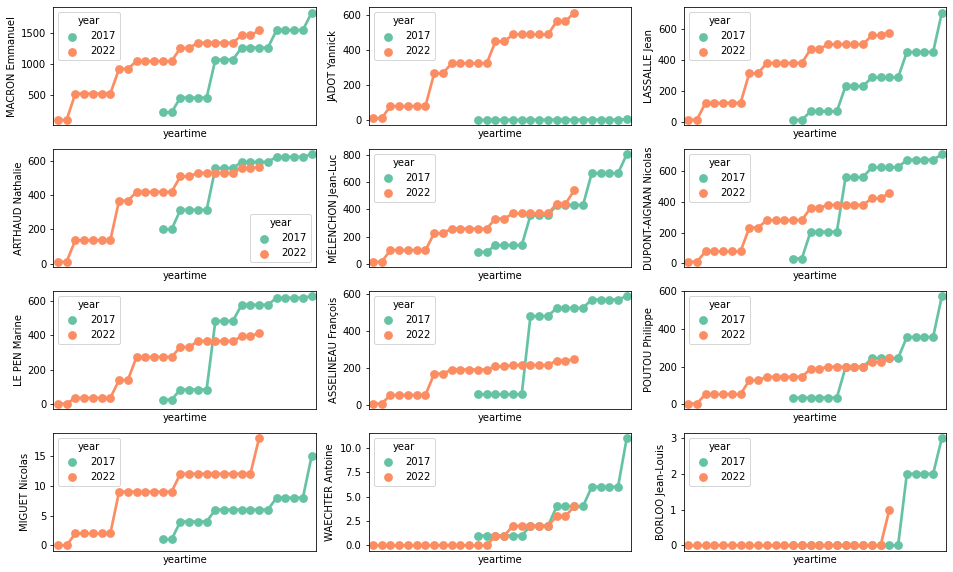

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# = plt.subplots(ncols=4,)
fig, axes = plt.subplots(nrows=4,ncols=3)
fig.set_figheight(10)
fig.set_figwidth(16)
k=0
for i,j in zip(two_times[:12],[0,0,0,1,1,1,2,2,2,3,3,3]):
    print(i)
    ax = sns.pointplot(x='yeartime',y=i,hue='year',palette="Set2",data=subset_df,ax=axes[j][k%3])
    _ =ax.get_xaxis().set_ticks([])
    k+=1
